<a href="https://colab.research.google.com/github/ryu-i-engineer/ImageTaggingChallenge/blob/main/notebooks/ImageTaggingChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Tagging Challenge

## Overview : 概要

### Project target : プロジェクト目標

- 普通のECサイトにおける検索機能について､改善方法を検討する
- 画像認識によるタグ付けの開発を優先する
- メンバーも実際のプロジェクト経験をもらいつつ､デモプロジェクトの開発と記事を作成できるまで頑張る

In English:
- Consider the ways how to improve search function on e-commerce site.
- Prioritize the development of tagging by image recognition.
- The members will do our best until creating an article and developing demo project, gaining project experience.


### Study scope : 学習範囲

* Note記事を書く
* 画像認識によるタグ付けを優先して開発する
* 日本語･英語両方タグ付けできるようにする

In English:

* Write a note article
* Develop tagging system by image recognition in priority
* The system becomes able to tag  in Japanese and English


### Repository

* [TOP](https://github.com/ryu-i-engineer/ImageTaggingChallenge)
* [Projects](https://github.com/ryu-i-engineer/ImageTaggingChallenge/projects/2)
* [Sample Project](https://github.com/ryu-i-engineer/ImageTaggingChallenge/tree/main/src/app)

## Reference

- [転移学習：機械学習の次のフロンティアへの招待](https://qiita.com/icoxfog417/items/48cbf087dd22f1f8c6f4#%E8%BB%A2%E7%A7%BB%E5%AD%A6%E7%BF%92%E3%81%AE%E5%8F%96%E3%82%8A%E7%B5%84%E3%82%80%E5%95%8F%E9%A1%8C)
- [Transfer learning with TensorFlow Hub](https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub)
- [Image segmentation](https://www.tensorflow.org/tutorials/images/segmentation)
- [13_semi_supervised_learning](https://colab.research.google.com/github/machine-perception-robotics-group/MPRGDeepLearningLectureNotebook/blob/master/11_cnn_pytorch/13_semi_supervised_learning.ipynb?authuser=0#scrollTo=tPyzEOSCUTI1)
- [Semi-supervised image classification using contrastive pretraining with Sim CLR](https://keras.io/examples/vision/semisupervised_simclr/)
- [Self-training with Noisy Student improves ImageNet classification](https://arxiv.org/pdf/1911.04252.pdf)
- [Google-Research Noisy Student](https://github.com/google-research/noisystudent)
-[Qiita: Keras Noisy studentを実装してみた](https://qiita.com/rabbitcaptain/items/a15591ca49dc428223ca)


### Others
- [Vision Transformer and MLP-Mixer Architectures](https://github.com/google-research/vision_transformer)
- [Image classification with Vision Transformer](https://keras.io/examples/vision/image_classification_with_vision_transformer/)
- [ResNet - PyTorch](https://rwightman.github.io/pytorch-image-models/models/resnet/)
- [Noisy Student (EfficientNet)](https://rwightman.github.io/pytorch-image-models/models/noisy-student/)
- [Multi-label classification with PyTorch](https://github.com/aman5319/Multi-Label/blob/master/Classify_scenes.ipynb)

# Dataset structure

## Directory

<pre>
Root
│─  label.csv
│
└─images
        └─000000.jpg
        └─000001.jpg
        └─000002.jpg
        └─000003.jpg
        └─000004.jpg
        └─000005.jpg
        └─000006.jpg
        └─000007.jpg
        └─000008.jpg
        └─000009.jpg
        └─000010.jpg
</pre>

## Define lables and binarize

#### CSV format

```csv
"filename","tag1","tag2","tag3","tag4","tag5","tag6","tag7","tag8","tag9","tag10"
"1.jpg","sea","cape","clouds","sunset"
"2.jpg","mountains","trees","people"
```

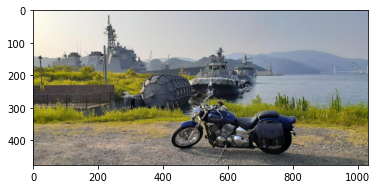

filenames bikes grasses mountains sea ships sky
2  2003.jpg     1       1         1   1     1   1

In [136]:
image = Image.open(os.path.join(train_val_root_dir, "images", df["filenames"][2])).convert("RGB")
plt.imshow(image)
plt.show()

pd.DataFrame(df.loc[2, df.iloc[2]!=0]).T

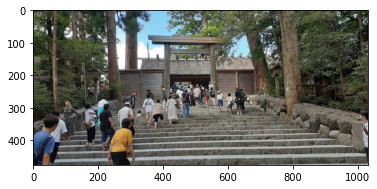

filenames clouds cobblestone people shrine sky stairs torii trees
3  2004.jpg      1           1      1      1   1      1     1     1

In [135]:
image = Image.open(os.path.join(train_val_root_dir, "images", df["filenames"][3])).convert("RGB")
plt.imshow(image)
plt.show()

pd.DataFrame(df.loc[3, df.iloc[3]!=0]).T

In [10]:
N = len(df)

just_num = max(len(l) for l in df.drop(['filenames'], axis=1).columns)+1

for k, label in enumerate(df.drop(['filenames'], axis=1).columns):
    pos = sum(df[label] == 1)
    print(f"{label.ljust(just_num)}\tPos samples: {pos:<5}\tNeg samples: {N-pos:<5} \t Pos of total: {100 * pos / N:.2f}%")

bikes          	Pos samples: 32   	Neg samples: 1574  	 Pos of total: 1.99%
bridge         	Pos samples: 27   	Neg samples: 1579  	 Pos of total: 1.68%
capes          	Pos samples: 71   	Neg samples: 1535  	 Pos of total: 4.42%
cherry blossom 	Pos samples: 10   	Neg samples: 1596  	 Pos of total: 0.62%
clouds         	Pos samples: 523  	Neg samples: 1083  	 Pos of total: 32.57%
cobblestone    	Pos samples: 50   	Neg samples: 1556  	 Pos of total: 3.11%
dessert        	Pos samples: 394  	Neg samples: 1212  	 Pos of total: 24.53%
grasses        	Pos samples: 221  	Neg samples: 1385  	 Pos of total: 13.76%
island         	Pos samples: 73   	Neg samples: 1533  	 Pos of total: 4.55%
lighthouses    	Pos samples: 32   	Neg samples: 1574  	 Pos of total: 1.99%
maple          	Pos samples: 34   	Neg samples: 1572  	 Pos of total: 2.12%
miscanthus     	Pos samples: 33   	Neg samples: 1573  	 Pos of total: 2.05%
mountains      	Pos samples: 640  	Neg samples: 966   	 Pos of total: 39.85%
night   

# Codes

## Prepare

In [ ]:
# !tar -zxvf fasteners_dataset.tar.gz > /dev/null

In [ ]:
# # On Colab runtime
# !pip install -U albumentations==0.4.5 > /dev/null && echo
# !pip install transformers > /dev/null && echo
# !pip install pytorch-lightning > /dev/null && echo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import os
import glob
from textwrap import wrap
import torchmetrics
import tensorboard

import albumentations as alb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import pytorch_lightning as pl
import torch.nn.functional as F

from PIL import Image
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MultiLabelBinarizer
from torch import nn
from torch.optim.optimizer import Optimizer
from torch.utils.data import DataLoader, Dataset, random_split
from tqdm import tqdm
from transformers import BeitModel, BeitFeatureExtractor
from torchvision import transforms
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint
from albumentations.pytorch import ToTensorV2
from torch.autograd import Variable

print(f"PyTorch Version: {torch.__version__}")
print("Num GPUs Available: ", torch.cuda.device_count())
for i in range(torch.cuda.device_count()):
    print("Device Name: ", torch.cuda.get_device_properties(i).name)

PyTorch Version: 1.10.0+cu113
Num GPUs Available:  1
Device Name:  NVIDIA GeForce GTX 1060 6GB


## Params

In [2]:
BATCH_SIZE = 32 # 256 if torch.cuda.device_count() else 64
resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
SEED = 42

np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Load dataset

In [3]:
train_val_root_dir = './inputs/miml_dataset/'
test_root_dir = './inputs/albanycountryfasteners/test/'

In [118]:
import pandas as pd
df = pd.read_csv(".//inputs/miml_dataset/class_label.csv")
df.dropna(axis=1, how="all")

filenames      tag1    tag2    tag3   tag4       tag5     tag6    tag7  \
0     2001.jpg     bikes   ships     sea    sky  mountains  grasses     NaN   
1     2002.jpg     bikes   ships     sea    sky  mountains  grasses     NaN   
2     2003.jpg     bikes   ships     sea    sky  mountains  grasses     NaN   
3     2004.jpg    shrine   torii   torii  trees        sky   clouds  stairs   
4     2005.jpg    shrine   torii   torii  trees        sky   clouds  stairs   
...        ...       ...     ...     ...    ...        ...      ...     ...   
1601  1196.jpg    sunset   trees  clouds    sky        NaN      NaN     NaN   
1602  1197.jpg  sunshine  clouds     sea    NaN        NaN      NaN     NaN   
1603  1198.jpg       sea     NaN     NaN    NaN        NaN      NaN     NaN   
1604  1199.jpg       sea     NaN     NaN    NaN        NaN      NaN     NaN   
1605  1200.jpg       sea     NaN     NaN    NaN        NaN      NaN     NaN   

        tag8         tag9  
0        NaN          NaN  
1        NaN          NaN  
2        NaN          NaN  
3     people  cobblestone  
4     people  cobblestone  
...      ...          ...  
1601     NaN          NaN  
1602     NaN          NaN  
1603     NaN          NaN  
1604     NaN          NaN  
1605     NaN          NaN  

[1606 rows x 10 columns]

In [5]:
def binarize_df(label_path):
    df = pd.read_csv(label_path)
    df = df.dropna(axis=1, how="all")  # save memory and process usage
    df = df.fillna("None")  # to avoid error

    mlb = MultiLabelBinarizer()
    result = mlb.fit_transform(df.drop(columns=["filenames"]).values)  # drop not tagging cols

    bin_df = pd.DataFrame(result, columns=mlb.classes_)  # drop non-useless col.
    if 'None' in bin_df.columns:
        bin_df = bin_df.drop("None", axis=1)

    return df.drop(df.columns[1:], axis=1).join(bin_df)

In [119]:
df = binarize_df(os.path.join(train_val_root_dir, "class_label.csv"))

In [7]:
test_df = binarize_df(os.path.join(test_root_dir, 'label.csv'))

In [8]:
LABELS = df.columns[1:]

In [9]:
# prune or use at all
sample_df = df.sample(len(df))

In [ ]:
beit_feature_extractor = BeitFeatureExtractor.from_pretrained('microsoft/beit-base-patch16-224-pt22k-ft22k')

In [11]:
def covert_onehot_string_labels(label_string,label_onehot):
    labels = []
    for i, label in enumerate(label_string):
        if label_onehot[i]:
            labels.append(label)
    if len(labels) == 0:
        labels.append("NONE")
    return labels

In [ ]:
class ImgTagDataset(Dataset):
    """
    Create dataset for multi-label classification.

    Parameters
    ----------------
    df : pd.DataFrame
        Pandas DataFrame object.
        It must be contained "filename", and multi-binarized encoded columns.

    root_dir: str
        Root directory of Datasets
    """

    def __init__(self, df: pd.DataFrame, root_dir, transform):
        self.df = df
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        d = self.df.iloc[index]
        image = Image.open(
            os.path.join(self.root_dir, 'images', d["filenames"])
        ).convert("RGB")
        image = self.transform(image=np.squeeze(image))["image"]
        image = beit_feature_extractor(images=image, return_tensors="pt")['pixel_values'].squeeze(0)
        image = np.clip(image, 0, 1)
        label = torch.tensor(d[1:].tolist(), dtype=torch.float32)
        return image, label


In [ ]:
class ImgTagDataModule(pl.LightningDataModule):
    def __init__(
        self,
        root_dir: str,
        train_val_df: pd.DataFrame,
        test_df: pd.DataFrame = None,
        batch_size=32,
        img_size=224,
        mean=(0.5, 0.5, 0.5),
        std=(0.5, 0.5, 0.5),
    ):

        super().__init__()
        self.root_dir = root_dir
        self.train_val_df = train_val_df
        self.test_df = test_df
        self.batch_size = batch_size

        self.train_ds = None
        self.val_ds = None
        self.test_ds = None

        # pre-processing
        self.train_augmentation = alb.Compose(
            [
                alb.RandomResizedCrop(width=img_size, height=img_size, scale=(0.5, 1.0)),
                alb.SafeRotate(),
                alb.RandomBrightnessContrast(
                    brightness_limit=0.1, contrast_limit=0.2, p=0.5
                ),
                alb.ImageCompression(quality_lower=90, quality_upper=100, p=0.5),
                alb.GaussianBlur(blur_limit=(1, 3)),
                alb.CLAHE(clip_limit=6.0, tile_grid_size=(8, 8), p=1),
                alb.HorizontalFlip(),
                # alb.Normalize(mean, std),
                ToTensorV2(),
            ]
        )

        self.test_val_augmentation = alb.Compose(
            [
                alb.Resize(height=img_size, width=img_size),
                # alb.Normalize(mean=mean, std=std),
                ToTensorV2(),
            ]
        )

    def prepare_data(self):
        pass

    # Trainer.fit()ではtrain/valのDatasetを、Trainer.test()ではtestのDatasetを生成
    def setup(self, stage=None):
        if stage == 'fit' or stage is None:
            train_df, val_df = train_test_split(self.train_val_df, test_size=0.2)

            self.train_ds = ImgTagDataset(train_df, self.root_dir, self.train_augmentation)
            self.val_ds = ImgTagDataset(val_df, self.root_dir, self.test_val_augmentation)

        if stage == 'test' or stage is None:
            self.test_ds = ImgTagDataset(self.test_df, self.root_dir, self.test_val_augmentation)

    def train_dataloader(self):
        return DataLoader(self.train_ds, batch_size=self.batch_size, shuffle=True, num_workers=0, pin_memory=True)

    def val_dataloader(self):
        return DataLoader(self.val_ds, batch_size=self.batch_size, num_workers=0, pin_memory=True)

    def test_dataloader(self):
        return DataLoader(self.test_ds, batch_size=self.batch_size, num_workers=0, pin_memory=True)


In [ ]:
data_module = ImgTagDataModule(train_val_root_dir, sample_df, test_df, batch_size=BATCH_SIZE)

In [ ]:
data_module.setup('fit')

25 samples from the dataset


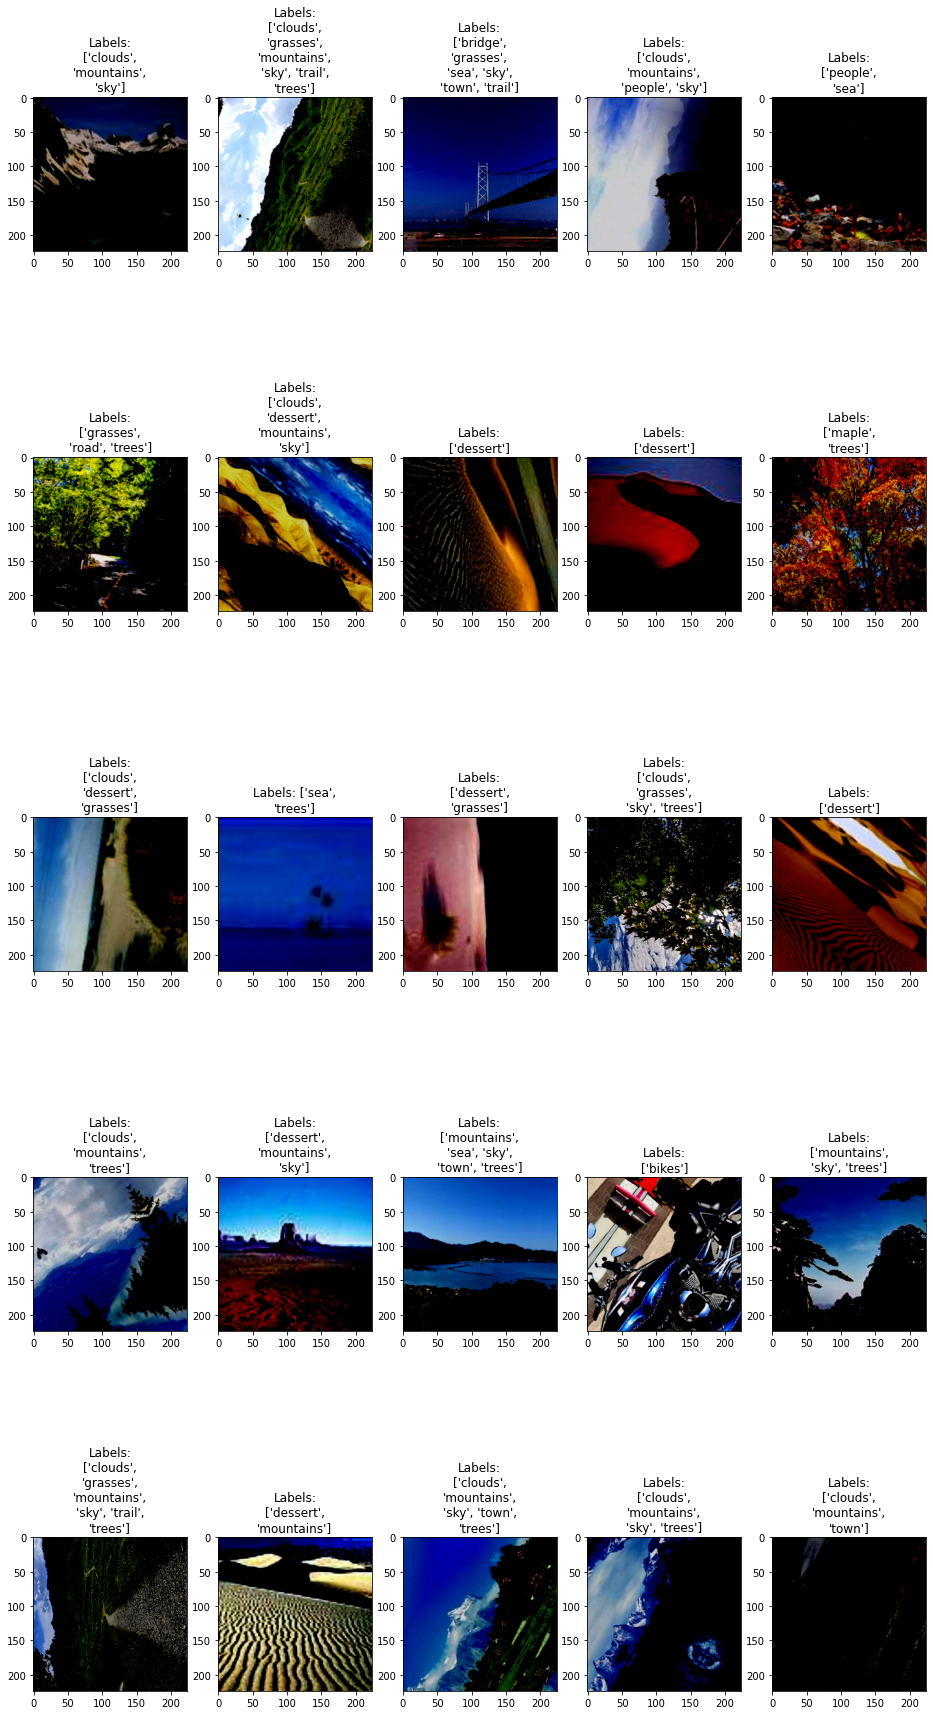

In [ ]:
from textwrap import wrap

def show_samples(data_module):
    fig=plt.figure(figsize=(16, 16))
    fig.set_figheight(32)
    columns = 5
    rows = 5
    print(columns*rows,"samples from the dataset")
    for i in range(columns*rows):
        (image, label) = data_module.train_ds[i]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(np.transpose(image, (1, 2, 0)))
        plt.title('\n'.join(wrap("Labels: "+str(covert_onehot_string_labels(LABELS, label)), 16)))

    plt.show()


show_samples(data_module)

## Create model

In [ ]:
class_weight = []
for k, label in enumerate(sample_df.drop(['filenames'], axis=1).columns):
    class_weight.append((sample_df[label] == 1).sum() / len(sample_df))
class_weight = torch.FloatTensor(class_weight).to(device)
class_weight

tensor([0.0199, 0.0168, 0.0442, 0.0062, 0.3257, 0.0311, 0.2453, 0.1376, 0.0455,
        0.0199, 0.0212, 0.0205, 0.3985, 0.0062, 0.1065, 0.0031, 0.0205, 0.3531,
        0.0149, 0.0635, 0.0255, 0.4869, 0.0187, 0.0965, 0.0149, 0.0523, 0.0324,
        0.0286, 0.2958], device='cuda:0')

In [ ]:
# calculate pos weight
pos_weight = []

for k, label in enumerate(sample_df.drop(["filenames"], axis=1).columns):
    pos_weight.append((sample_df[label] == 1).sum())

max_count = max(pos_weight)

for i in range(len(pos_weight)):
    if pos_weight[i] == 0:
        continue

    pos_weight[i] = max_count / pos_weight[i]

pos_weight = torch.FloatTensor(pos_weight).to(device)
pos_weight = torch.nn.functional.softmax(pos_weight*1e-2, dim=0)*1e+2
pos_weight

tensor([ 3.2525,  3.4030,  2.8439,  5.5680,  2.5857,  2.9786,  2.5984,  2.6391,
         2.8353,  3.2525,  3.2061,  3.2285,  2.5786,  5.5680,  2.6665, 12.1708,
         3.2285,  2.5827,  3.5285,  2.7503,  3.0826,  2.5729,  3.3059,  2.6791,
         3.5285,  2.7958,  2.9607,  3.0193,  2.5896], device='cuda:0')

In [ ]:
class BeiTNet(nn.Module):
    def __init__(self, pretrained_beit_model, class_num):
        super(BeiTNet, self).__init__()
        self.beit = pretrained_beit_model
        self.fc = nn.Sequential(
            nn.LayerNorm(768, eps=1e-12),
            nn.Linear(768, 768),
            nn.Dropout(0.1),
            nn.LayerNorm(768, eps=1e-12),
            nn.Tanh(),
            nn.Linear(768, class_num)
        )

        # まず全パラメータを勾配計算Falseにする
        for param in self.parameters():
            param.requires_grad = False

        for param in self.beit.encoder.layer[-1].parameters():
            param.requires_grad = True

        # 追加したクラス分類用の全結合層を勾配計算ありに変更
        for param in self.fc.parameters():
            param.requires_grad = True

    def _get_cls_vec(self, states):
        return states['last_hidden_state'][:, 0, :]

    def forward(self, img):
        output = self.beit(img)
        output = self._get_cls_vec(output)
        output = self.fc(output)
        return output.squeeze(0)

In [ ]:
class ImgTagLitModule(pl.LightningModule):
    def __init__(self, net, class_num, lr=5e-4, pos_weight=None):
        super().__init__()
        # self.save_hyperparameters()

        self.lr = lr
        self.class_num = class_num
        self.pos_weight = pos_weight
        self.net = BeiTNet(net, class_num)
        self.forward = self.net.forward

    def training_step(self, batch, batch_idx):
        img, labels = batch
        outputs = self.forward(img)

        loss = 0
        if labels is not None:
            loss = nn.functional.binary_cross_entropy_with_logits(outputs, labels, pos_weight=self.pos_weight)

        self.log("train_loss", loss)
        return loss

    def validation_step(self, batch, batch_idx):
        img, labels = batch
        outputs = self.forward(img)

        loss = 0
        if labels is not None:
            loss = nn.functional.binary_cross_entropy_with_logits(outputs, labels, pos_weight=self.pos_weight)

        self.log("val_loss", loss)
        return loss

    def test_step(self, batch, batch_idx):
        img, labels = batch
        outputs = self.forward(img)

        loss = 0
        if labels is not None:
            loss = nn.functional.binary_cross_entropy_with_logits(outputs, labels)

        self.log("test_loss", loss)
        return loss

    def configure_optimizers(self):
        optimizer = optim.Adam([
            {'params': self.net.beit.encoder.layer[-1].parameters(), 'lr': 1e-8},
            {'params': self.net.fc.parameters(), 'lr': self.lr}
        ])

        return optimizer


## Train model

In [ ]:
beit_model = BeitModel.from_pretrained('microsoft/beit-base-patch16-224-pt22k-ft22k')

C:\Users\Lisa-Windows\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Some weights of the model checkpoint at microsoft/beit-base-patch16-224-pt22k-ft22k were not used when initializing BeitModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing BeitModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BeitModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
early_stop_callback = EarlyStopping(
    monitor='train_loss', min_delta=0.01, patience=6, mode='min')

# モデルの保存先
# epoch数に応じて、「epoch=0.ckpt」のような形で保存
checkpoint_callback = ModelCheckpoint(dirpath='./models/tmp/',
    filename='{epoch}', monitor='train_loss', mode='min', verbose=True)

# Initialize a trainer
trainer = pl.Trainer(
    gpus=torch.cuda.device_count(),
    max_epochs=300,
    callbacks=[checkpoint_callback, early_stop_callback],
    log_every_n_steps=1,
    # fast_dev_run=True,
    )

module  = ImgTagLitModule(beit_model, len(LABELS), lr=2e-3, pos_weight=pos_weight)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [ ]:
# Train the model
trainer.fit(module, data_module)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type    | Params
---------------------------------
0 | net  | BeiTNet | 86.4 M
---------------------------------
7.7 M     Trainable params
78.7 M    Non-trainable params
86.4 M    Total params
345.512   Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Epoch 0, global step 40: train_loss reached 1.00736 (best 1.00736), saving model to "D:\git\ImageTaggingChallenge\models\tmp\epoch=0-v2.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 1, global step 81: train_loss reached 0.48116 (best 0.48116), saving model to "D:\git\ImageTaggingChallenge\models\tmp\epoch=1.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 2, global step 122: train_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 3, global step 163: train_loss reached 0.43929 (best 0.43929), saving model to "D:\git\ImageTaggingChallenge\models\tmp\epoch=3-v2.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 4, global step 204: train_loss reached 0.26050 (best 0.26050), saving model to "D:\git\ImageTaggingChallenge\models\tmp\epoch=4-v1.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 5, global step 245: train_loss reached 0.20166 (best 0.20166), saving model to "D:\git\ImageTaggingChallenge\models\tmp\epoch=5.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 6, global step 286: train_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 7, global step 327: train_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 8, global step 368: train_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 9, global step 409: train_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 10, global step 450: train_loss reached 0.15238 (best 0.15238), saving model to "D:\git\ImageTaggingChallenge\models\tmp\epoch=10.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 11, global step 491: train_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 12, global step 532: train_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 13, global step 573: train_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 14, global step 614: train_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 15, global step 655: train_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 16, global step 696: train_loss was not in top 1


## Save model

In [ ]:
from datetime import date
import time

export_path = f"./models/{date.today().isoformat()}_{str(int(time.time()))}"
if os.path.exists(export_path) is False:
    os.mkdir(export_path)
torch.save(module.net.state_dict(), os.path.join(export_path, "beit_model.pt"))

## Load model

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = BeiTNet(beit_model, len(LABELS)).to(device)

net.load_state_dict(torch.load(os.path.join(export_path, "beit_model.pt")))
net.eval()

BeiTNet(
  (beit): BeitModel(
    (embeddings): BeitEmbeddings(
      (patch_embeddings): PatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): BeitEncoder(
      (layer): ModuleList(
        (0): BeitLayer(
          (attention): BeitAttention(
            (attention): BeitSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
              (relative_position_bias): BeitRelativePositionBias()
            )
            (output): BeitSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): BeitInterme

## Evaluate

In [ ]:
# Start tensorboard.
%reload_ext tensorboard
%tensorboard --logdir ./lightning_logs/

# Open -> http://127.0.0.1:6006/#scalars

9 samples from the dataset


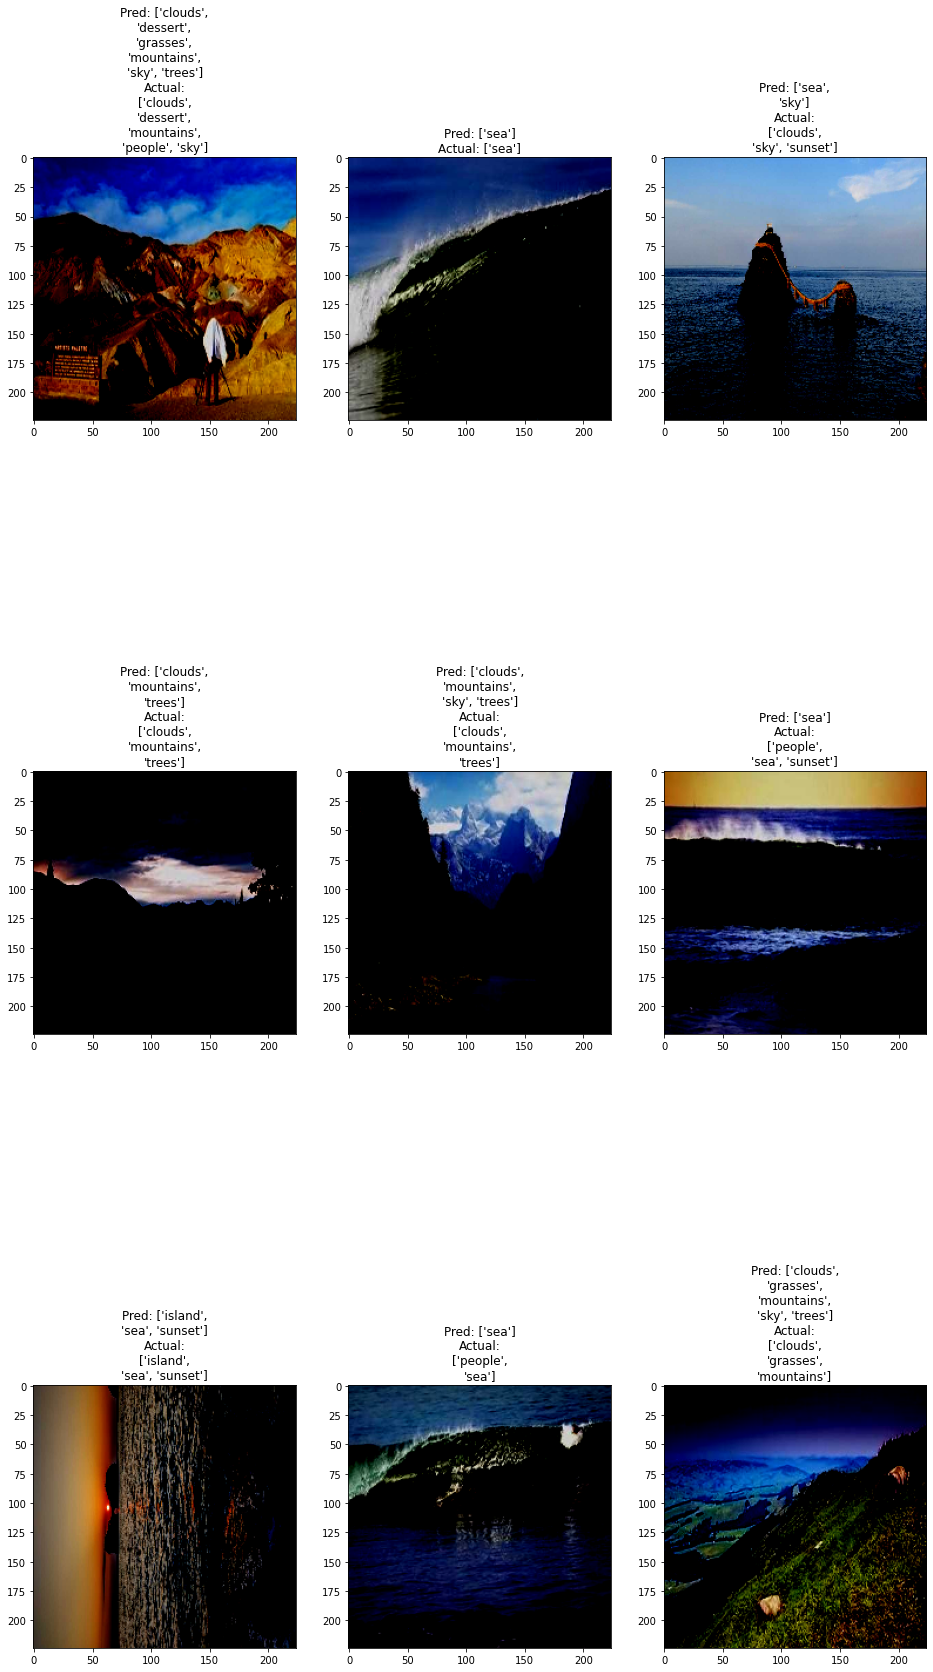

In [ ]:
def show_samples(data_module):
    fig=plt.figure(figsize=(16, 16))
    fig.set_figheight(32)
    columns = 3
    rows = 3
    i, (image, label) = next(enumerate(data_module.val_dataloader()))
    net.eval()
    label = label.to(device)
    image2 = image.to(device)
    preds = net(image2)
    print(columns*rows,"samples from the dataset")
    for i in range(columns*rows):
        fig.add_subplot(rows, columns, i+1)
        pred = preds[i]
        pred[pred>0.5]=1
        pred[pred<=0.5]=0
        plt.imshow(np.clip(image[i].numpy().transpose([1, 2, 0]), 0, 1))

        plt.title('\n'.join(wrap("Pred: "+ str(covert_onehot_string_labels(LABELS, pred)), 16)) + "\n" + '\n'.join(wrap("Actual: "+str(covert_onehot_string_labels(LABELS, label[i])), 16)))

    plt.show()

show_samples(data_module)

# Test

In [ ]:
test_data_dir = "./inputs/albanycountryfasteners/test/images"
test_data_dir = "./inputs/test2/"
# test_data_dir = "./inputs/Camera/"
test_filenames = glob.glob(os.path.join(test_data_dir, "*.jpg"))

25 samples from the dataset


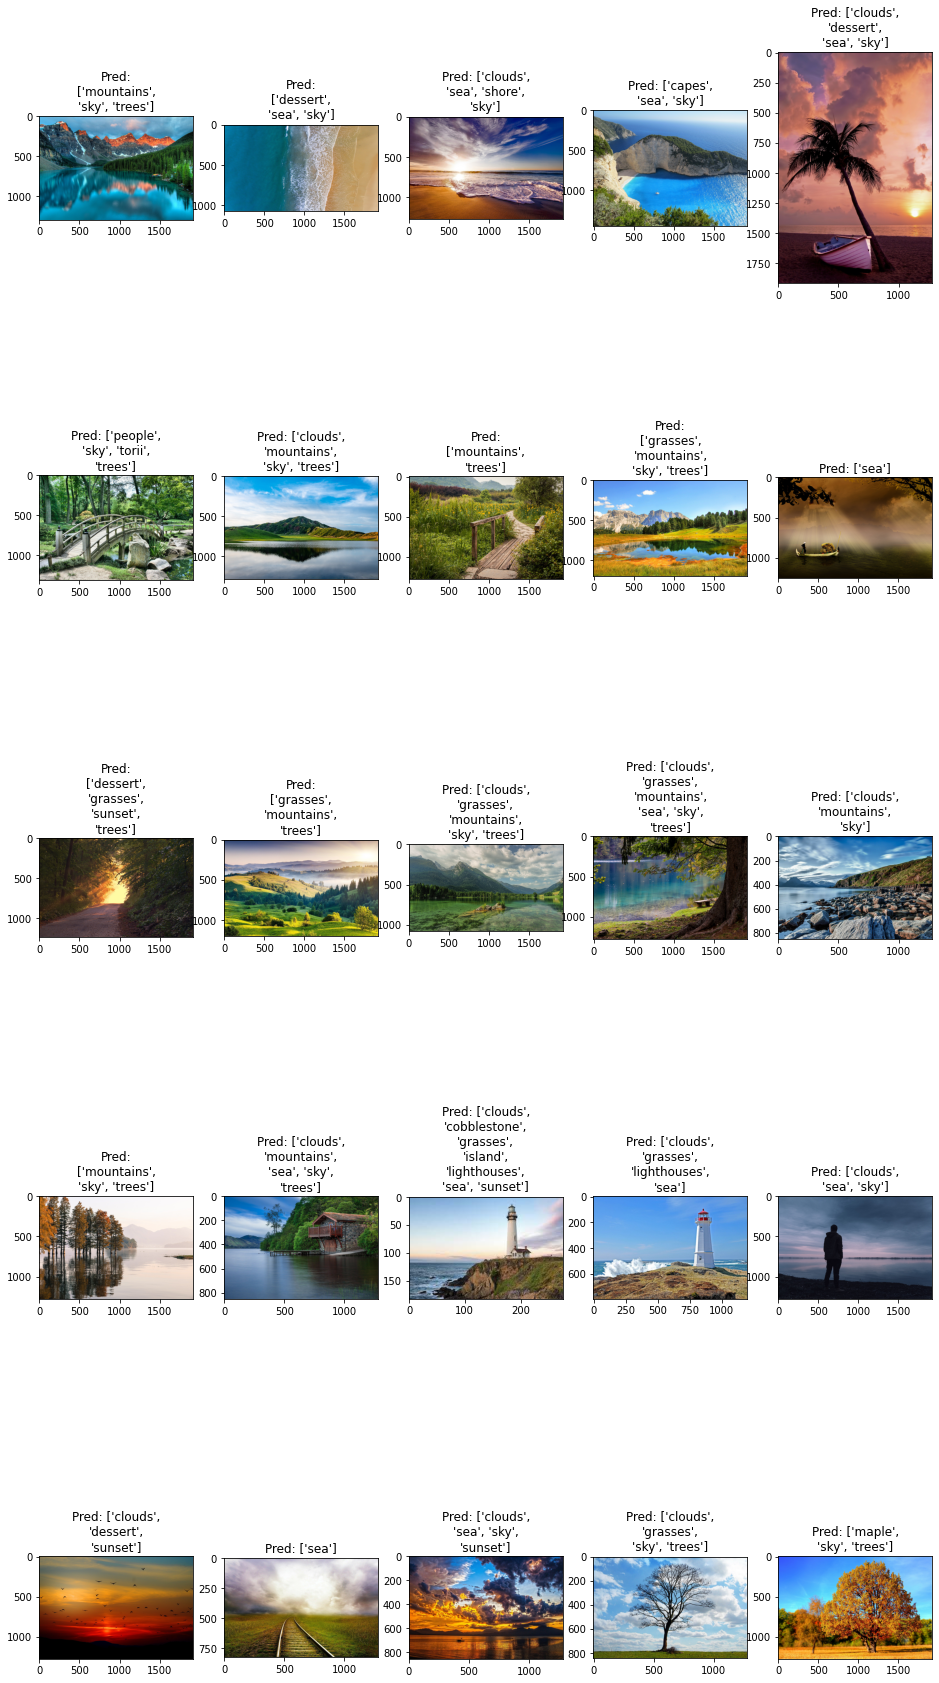

In [ ]:
# Using 200 images of 2000.
import random
def show_samples(test_filenames):
    fig=plt.figure(figsize=(16, 16))
    fig.set_figheight(32)
    columns = 5
    rows = 5
    net.eval()

    print(columns*rows,"samples from the dataset")
    for i in range(len(test_filenames[:columns*rows])):
        selected_index = random.randint(0, len(test_filenames)-1)
        fig.add_subplot(rows, columns, i+1)
        image = Image.open(test_filenames[i]).convert("RGB")
        image_transformed = beit_feature_extractor(np.squeeze(image), return_tensors='pt')['pixel_values']
        # image2 = testl_augmentation(image=np.squeeze(image))["image"]
        # image_transformed = np.clip(image_transformed, 0, 1)
        
        image_transformed = image_transformed.expand([1, 3, 224, 224])
        preds = image_transformed.cuda()
        preds = net(preds)
        preds[preds>0.5]=1
        preds[preds<=0.5]=0
        plt.imshow(image)

        plt.title('\n'.join(wrap("Pred: "+ str(covert_onehot_string_labels(LABELS, preds)), 16)))

    plt.show()


show_samples(test_filenames)

25 samples from the dataset


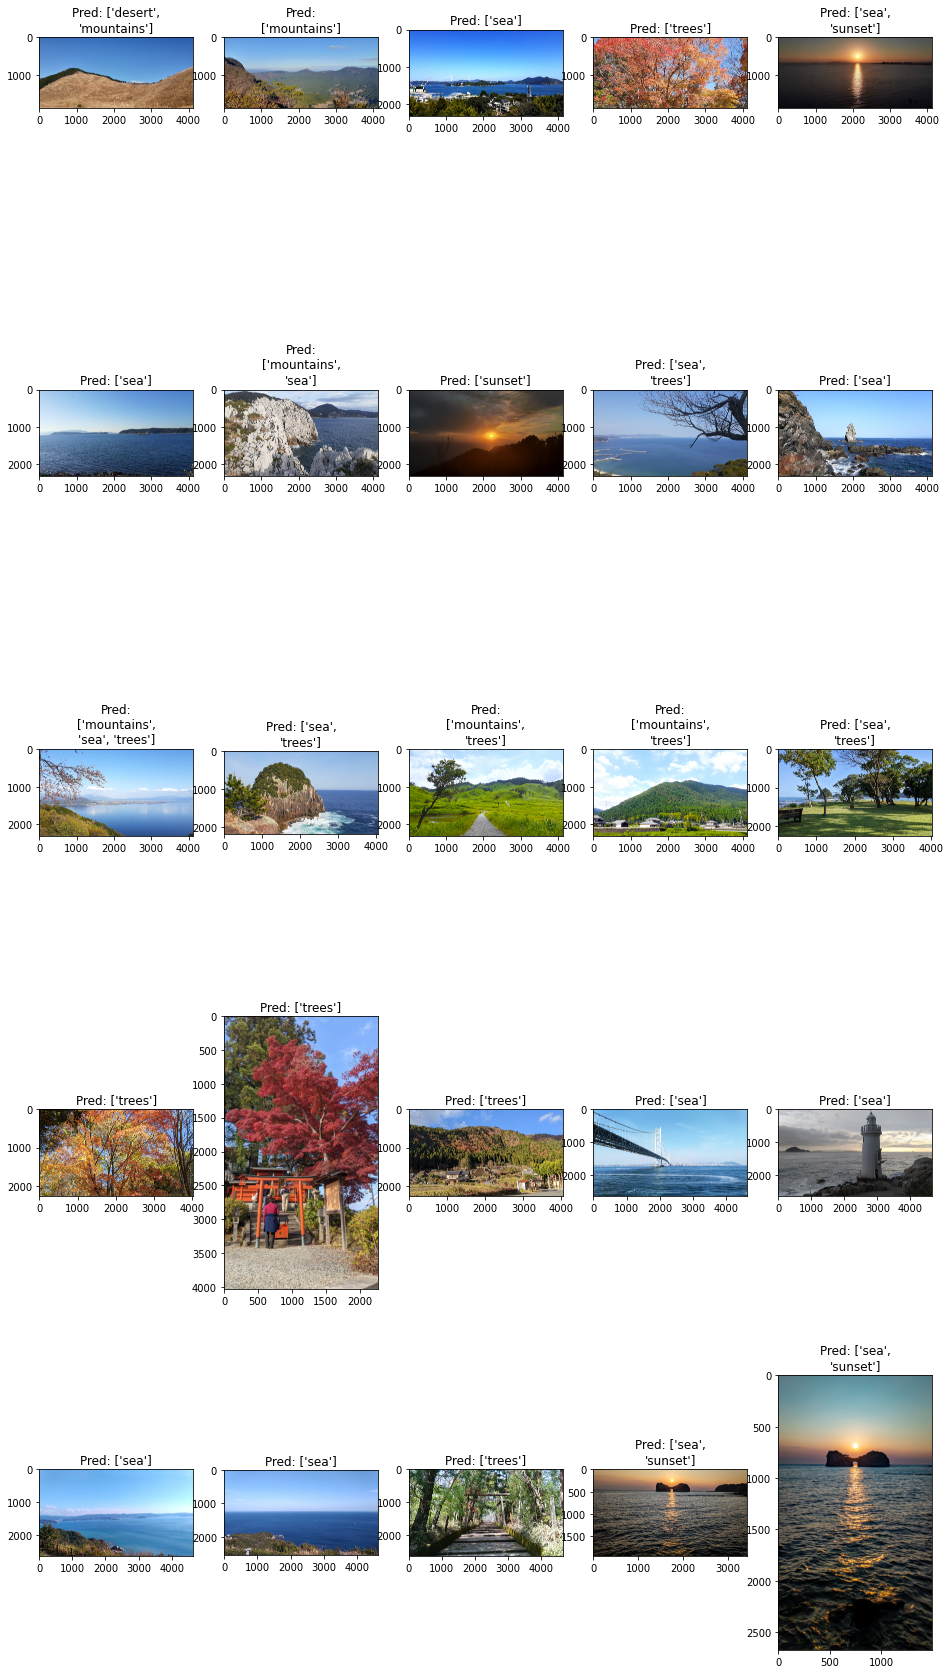

In [ ]:
# Using 1500 images of 2000.
import random
def show_samples(test_filenames):
    fig=plt.figure(figsize=(16, 16))
    fig.set_figheight(32)
    columns = 5
    rows = 5
    net.eval()

    print(columns*rows,"samples from the dataset")
    for i in range(len(test_filenames[:columns*rows])):
        selected_index = random.randint(0, len(test_filenames))
        fig.add_subplot(rows, columns, i+1)
        image = Image.open(test_filenames[i]).convert("RGB")
        image_transformed = beit_feature_extractor(np.squeeze(image), return_tensors='pt')['pixel_values']
        # image2 = testl_augmentation(image=np.squeeze(image))["image"]
        # image_transformed = np.clip(image_transformed, 0, 1)
        
        image_transformed = image_transformed.expand([1, 3, 224, 224])
        preds = image_transformed.cuda()
        preds = net(preds)
        preds[preds>0.5]=1
        preds[preds<=0.5]=0
        plt.imshow(image)

        plt.title('\n'.join(wrap("Pred: "+ str(covert_onehot_string_labels(LABELS, preds[0])), 16)))

    plt.show()


show_samples(test_filenames)